<a href="https://colab.research.google.com/github/pikey-msc/ValOpc/blob/main/2024-2/Cobert_Arb_Unip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cobertura Uniperiodo

Funciones de cobertura $\alpha$ y $\beta$

In [ ]:
import math

def calculate_alpha(X_u, X_d, S_u, S_d):
    alpha = (X_u - X_d) / (S_u - S_d)
    return alpha

def calculate_beta(B, X_u, X_d, S_u, S_d):
    beta = B * (X_u - (((X_u - X_d) * S_d) / (S_u - S_d)))
    return beta

In [ ]:
a=calculate_alpha(20,0,120,80)
a

0.5

In [ ]:
b=calculate_beta(10/11 ,20,0,120,80)
b

-18.18181818181818

In [ ]:
(20-(20/40)*120)*10/11

-36.36363636363637

# Binomial Multiperiodo (no multiplicativo - no binomial)

## Ejemplo Árbol binomial (No multiplicativo) que recombina valores

Insumos

In [ ]:
S0 = 100 # @param {type:"number"}
K = 100 # @param {type:"number"}
T = 3 # @param {type:"integer"}
Tasa_interes = 0.06 # @param {type:"slider", min:0, max:0.25, step:0.01}


Vector de precios recombinados, es decir, en cada rama se recombinan los valores

In [ ]:

S=[100, 80, 120, 60, 100, 140, 40, 80, 120, 160]

S = list(range(15))  # Asume que S es una lista de 10 elementos
levels = {i: S[(i*(i+1))//2 : ((i+1)*(i+2))//2] for i in range(5)}
levels

{0: [0], 1: [1, 2], 2: [3, 4, 5], 3: [6, 7, 8, 9], 4: [10, 11, 12, 13, 14]}

In [ ]:
(5*6)//2

15

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Parámetros iniciales

# Construir el árbol de precios S
levels = {}  # Diccionario para almacenar los nodos por nivel
# El diccionario se asigna  {entrada : valor}
# for t in range(T+1):
#     levels[t] = [s for s in range(t,t+1)]
levels[0] = [S[0]]
levels[1] = S[1:3]
levels[2] = S[3:6]
levels[3] = S[6:10]

# Calcular q_n y X_n para cada nodo
X = {}  # Diccionario para almacenar los valores X
q = {}  # Diccionario para almacenar los valores q

print(levels)

for idx, S_T in enumerate(levels[T]): #iteración de subíndices y precios de cada rama
    X[(T, idx)] = max(S_T - K, 0)

X

# Calcular X para nodos anteriores a T
for t in reversed(range(T)): # iteramos ramas o "levels"
    for idx, S_n in enumerate(levels[t]): #iteración de subíndices y precios de cada rama
        # print("Rama")
        # print(t)
        # print("Rama precio")
        # print(t+1)
        S_u = levels[t+1][idx+1]
        # print("Prcio S_u")
        # print(S_u)
        S_d = levels[t+1][idx]
        # print("Prcio S_d")
        # print(S_d)
        q[(t, idx)] = (S_n - S_d) / (S_u - S_d)
        # print("q")
        # print(q)
        X[(t, idx)] = q[(t, idx)] * X[(t+1, idx+1)] + (1 - q[(t, idx)]) * X[(t+1, idx)]
        # print(X)

{0: [100], 1: [80, 120], 2: [60, 100, 140], 3: [40, 80, 120, 160]}


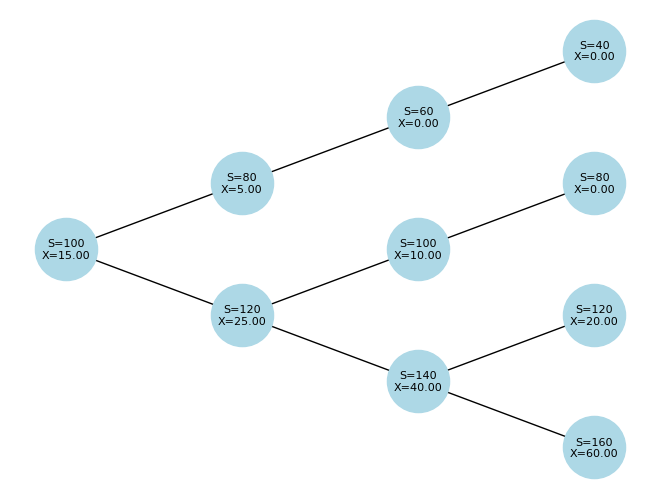

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Parámetros iniciales

# Construir el árbol de precios S
levels = {}  # Diccionario para almacenar los nodos por nivel
# El diccionario se asigna  {entrada : valor}
# for t in range(T+1):
#     levels[t] = [s for s in range(t,t+1)]
levels[0] = [S[0]]
levels[1] = S[1:3]
levels[2] = S[3:6]
levels[3] = S[6:10]



# Calcular q_n y X_n para cada nodo
X = {}  # Diccionario para almacenar los valores X
q = {}  # Diccionario para almacenar los valores q

# Inicializar los valores de X en el tiempo T
for idx, S_T in enumerate(levels[T]): #iteración de subíndices y precios de cada rama
    X[(T, idx)] = max(S_T - K, 0)

# Calcular X para nodos anteriores a T
for t in reversed(range(T)): # iteramos ramas o "levels"
    for idx, S_n in enumerate(levels[t]): #iteración de subíndices y precios de cada rama
        S_u = levels[t+1][idx+1]
        S_d = levels[t+1][idx]
        q[(t, idx)] = (S_n - S_d) / (S_u - S_d)
        X[(t, idx)] = q[(t, idx)] * X[(t+1, idx+1)] + (1 - q[(t, idx)]) * X[(t+1, idx)]

# Función para graficar el árbol
def plot_tree(levels, X):
    G = nx.Graph()
    pos = {}
    for t in levels:
        for idx, S in enumerate(levels[t]):
            node_label = (t, idx)
            G.add_node(node_label)
            pos[node_label] = (2*t, -2*idx + t)
            if t > 0:
                parent_label = (t-1, idx) if idx < len(levels[t-1]) else (t-1, idx-1)
                G.add_edge(parent_label, node_label)

    labels = {node: f"S={S:.0f}\nX={X[node]:.2f}" for node, S in zip(pos.keys(), sum(levels.values(), []))}

    nx.draw(G, pos, labels=labels, with_labels=True, node_size=2000, node_color='lightblue', font_size=8, arrows=False)
    plt.show()

plot_tree(levels, X)


##Ejercicio:
1. Agrega un proceso de estructura de $S$ que, con base en el total de precios en el vector, calcule lo siguiente: \\
a) número de ramas, \\
b) mande mensaje si está completo el árbol con base en las ramas, \\
c) crea una lista comprehensiva que mapee $S$ a "levels" correctamente su posición del árbol, \\
d) Asigna los valores del árbol en una matriz de $T\times T$, tal que se cumpla lo siguiente:
\begin{array}{c|cccc}
S_d / S_u & 0 & u & uu & uuu \\
\hline
0 & S_0 & S_u & S_{uu} & S_{uuu} \\
d & S_d & S_{ud} & S_{udu} & 0 \\
dd & S_{dd} & S_{ddu} & 0 & 0 \\
ddd & S_{ddd} & 0 & 0 & 0 \\
\end{array}
Esto generalizado a varias ramas, es decir, que el árbol se pase a una matriz diagonal. \
e) Grafica el árbol de $q$ \
f) Grafica el árbol de cobertura $\alpha$ y $\beta$


In [ ]:
# c)

S=[100, 80, 120, 60, 100, 140, 40, 80, 120, 160]
levels[0] = [S[0]]
levels[1] = S[1:3]
levels[2] = S[3:6]
levels[3] = S[6:10]
print(levels)
#sucesión:
# nivel 0 subíndice es 0
# nivel 1 subíndice es 1:3, 1, 3
# nivel 2 subíndice es 3:6, 3,6
# nivel 3 subíndice es 6:10, 6,10

#Cómo encontrar una sucesión 0,1,3,6
#Cómo encontrar una sucesión 0,3,6,10

n=4
# S = list(range((n*(n+1))//2))
# print(S)
levels = {i : S[(i*(i+1))//2:((i+1)*(i+2))//2] for i in range(n) }

levels
# for k in levels:
#   levels[k]= [S[i:j] for i,j in zip(suc1, suc2)]


{0: [100], 1: [80, 120], 2: [60, 100, 140], 3: [40, 80, 120, 160]}


{0: [100], 1: [80, 120], 2: [60, 100, 140], 3: [40, 80, 120, 160]}

In [ ]:
[(i*(i+1))//2 for i in range(4)] ## primera sucesión
[((i+1)*(i+2))/2 for i in range(4)] ## segunda sucesión

[1.0, 3.0, 6.0, 10.0]

# Binomial Multiperiodo Multiplicativo

Ejemplo:

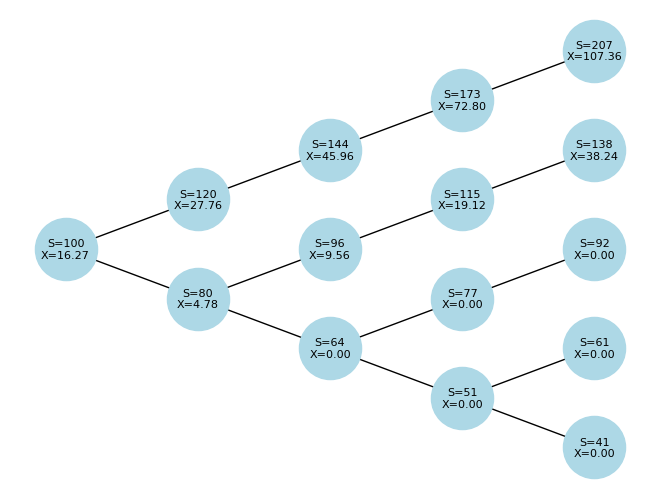

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Parámetros iniciales
S0 = 100  # Precio inicial
K = 100   # Precio de ejercicio
T = 4     # Periodos
u = 1.2   # Factor de subida
d = 0.8   # Factor de bajada
cop = 0 # call o put

# Construir el árbol de precios S
levels = {}  # Diccionario para almacenar los nodos por nivel
for t in range(T+1):
    levels[t] = [S0 * (u ** ups) * (d ** (t - ups)) for ups in reversed(range(t + 1))]

# Calcular q_n y X_n para cada nodo
X = {}  # Diccionario para almacenar los valores X
q = {}  # Diccionario para almacenar los valores q

# Inicializar los valores de X en el tiempo T
for idx, S_T in enumerate(levels[T]):
    X[(T, idx)] = max(S_T - K, 0)

# Calcular X para nodos anteriores a T
for t in reversed(range(T)):
    for idx, S_n in enumerate(levels[t]):
        S_u = levels[t+1][idx+1]
        S_d = levels[t+1][idx]
        q[(t, idx)] = (S_n - S_d) / (S_u - S_d)
        X[(t, idx)] = q[(t, idx)] * X[(t+1, idx+1)] + (1 - q[(t, idx)]) * X[(t+1, idx)]

# Función para graficar el árbol
def plot_tree(levels, X):
    G = nx.Graph()
    pos = {}
    for t in levels:
        for idx, S in enumerate(levels[t]):
            node_label = (t, idx)
            G.add_node(node_label)
            pos[node_label] = (2*t, -2*idx + t)
            if t > 0:
                parent_label = (t-1, idx) if idx < len(levels[t-1]) else (t-1, idx-1)
                G.add_edge(parent_label, node_label)

    labels = {node: f"S={S:.0f}\nX={X[node]:.2f}" for node, S in zip(pos.keys(), sum(levels.values(), []))}

    nx.draw(G, pos, labels=labels, with_labels=True, node_size=2000, node_color='lightblue', font_size=8, arrows=False)
    plt.show()

plot_tree(levels, X)


Ejercicio 2.

Crea una función donde, con base en los insumos necesarios, calcule la valuación de una opción europea multiplicativa, haz los ajustes necesarios para que con los parámetros se especifique si es call o put, agrega la tasa de interés.


Ejercicio 3.
Considere un activo que no paga dividendos cuyo precio es restringido a un árbol binomial multiplicativo de dos períodos con $u=3$ y $d=1/2$. Supón que $S(0) = 4$ y que $\exp(r\delta) = 2$. Considera una put europea con $K=3$.

1. Encuentra el valor de la opción trabajando el árbol hacia atrás (Grafícala, tanto en árbol como en tabla) \\
2. ¿Cuál es el portafolio que replica al tiempo $t = 0$?
3. Supón que en el primer periodo de tiempo el subyacente sube a 12. ¿Como debiése ser cambiado el portafolio que replica? (Muéstra todo el árbol de réplica)

In [ ]:
#

# Parámetros iniciales
S0 = 12  # Precio inicial
K = 3   # Precio de ejercicio
T = 2     # Periodos
B = 2
u = 3   # Factor de subida
d = 1/2   # Factor de bajada
cop = 1 # call (0) o put (1)

# Construir el árbol de precios S
levels = {}  # Diccionario para almacenar los nodos por nivel
for t in range(T+1):
    levels[t] = [S0 * (u ** ups) * (d ** (t - ups)) for ups in range(t + 1)]

# Calcular q_n y X_n para cada nodo
X = {}  # Diccionario para almacenar los valores X
q = {}  # Diccionario para almacenar los valores q
a = {}
b = {}

for idx, S_T in enumerate(levels[T]):
    X[(T, idx)] = max((S_T - K)*(-1)**(cop), 0) ##parametrizando el payoff para que sea call o put

# Calcular X para nodos anteriores a T
for t in reversed(range(T)):
    for idx, S_n in enumerate(levels[t]):
        S_u = levels[t+1][idx+1]
        S_d = levels[t+1][idx]
        q[(t, idx)] = (S_n*(B) - S_d) / (S_u - S_d)
        X[(t, idx)] = (q[(t, idx)] * X[(t+1, idx+1)] + (1 - q[(t, idx)]) * X[(t+1, idx)])*1/B
        a[(t, idx)] = (X[(t+1, idx+1)] - X[(t+1, idx)]) / (S_u - S_d)
        b[(t, idx)] = (X[(t+1, idx+1)] - ((X[(t+1, idx+1)] - X[(t+1, idx)])*S_u) / (S_u - S_d))*(1/B)

print(levels)
print(q)
print(X)
print(a)
print(b)

{0: [12.0], 1: [6.0, 36.0], 2: [3.0, 18.0, 108.0]}
{(1, 0): 0.6, (1, 1): 0.6, (0, 0): 0.6}
{(2, 0): -0.0, (2, 1): 0, (2, 2): 0, (1, 0): 0.0, (1, 1): 0.0, (0, 0): 0.0}
{(1, 0): 0.0, (1, 1): 0.0, (0, 0): 0.0}
{(1, 0): 0.0, (1, 1): 0.0, (0, 0): 0.0}


2. Plantea una evolución del precio, tal que el máximo sea 160 y el mínimo 40 para que con $T=100$ hagas una valoración. ¿Cuál es la diferencia con la valoración del ejemplo? Empezando con $S_0=100$

#Americana

{0: [4.0], 1: [8.0, 2.0], 2: [16.0, 4.0, 1.0]}
0.4666666666666666
{(2, 0): 0, (2, 1): 1.0, (2, 2): 4.0, (1, 0): 0, (1, 1): 3.0, (0, 0): 1.0}
{(2, 0): 0, (2, 1): 1.0, (2, 2): 4.0, (1, 0): 0.38888888888888884, (1, 1): 2.0, (0, 0): 1.3395061728395061}
{(2, 0): 0, (2, 1): 1.0, (2, 2): 4.0, (1, 0): 0.38888888888888884, (1, 1): 3.0, (0, 0): 1.3395061728395061}
{(1, 0): 0.08333333333333333, (1, 1): 1.0, (0, 0): 0.4351851851851852}
{(1, 0): 1.1111111111111112, (1, 1): 4.166666666666667, (0, 0): 3.2253086419753085}


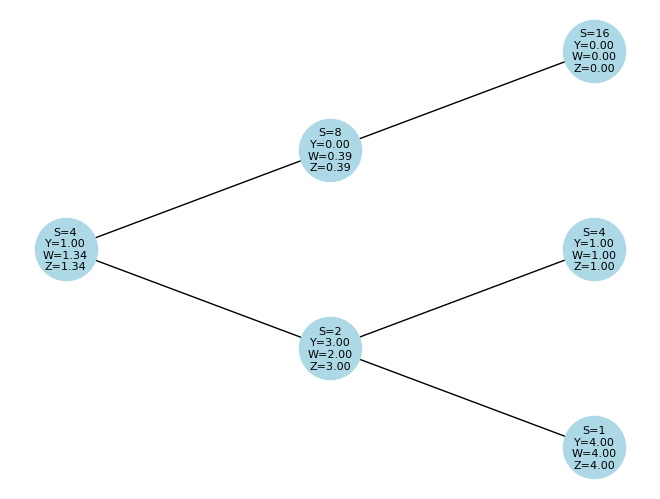

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
# Parámetros iniciales
S0 = 4  # Precio inicial
K = 5   # Precio de ejercicio
T = 2     # Periodos
r = 1/5
B = 1+r
u = 2   # Factor de subida
d = 1/2   # Factor de bajada
cop = 1 # call (0) o put (1)

# Construir el árbol de precios S
levels = {}  # Diccionario para almacenar los nodos por nivel
for t in range(T+1):
    levels[t] = [S0 * (u ** ups) * (d ** (t - ups)) for ups in reversed(range(t + 1))]

# Calcular q_n y X_n para cada nodo
Y = {}  # Diccionario para almacenar los valores Y
W = {}  # Diccionario para almacenar los valores W
Z = {}  # Diccionario para almacenar los valores W
a = {}
b = {}

q = (1+r-d)/(u-d)

for idx, S_T in enumerate(levels[T]):
    Y[(T, idx)] = max((S_T - K)*(-1)**(cop), 0) ##parametrizando el payoff para que sea call o put
    Z[(T, idx)] = max((S_T - K)*(-1)**(cop), 0)
    W[(T, idx)] = max((S_T - K)*(-1)**(cop), 0)
# Calcular X para nodos anteriores a T
for t in reversed(range(T)):
    for idx, S_n in enumerate(levels[t]):
        S_u = levels[t+1][idx+1]
        S_d = levels[t+1][idx]
        Y[(t, idx)] = max((S_n - K)*(-1)**(cop), 0)
        W[(t, idx)] = (q * Z[(t+1, idx+1)] + (1 - q) * Z[(t+1, idx)])*1/B
        Z[(t, idx)] = max(Y[(t, idx)],W[(t, idx)])
        a[(t, idx)] = (Z[(t+1, idx+1)] - Z[(t+1, idx)]) / ((u-d)*S_n) #(S_u - S_d)
        b[(t, idx)] = (Z[(t+1, idx+1)] - ((Z[(t+1, idx+1)] - Z[(t+1, idx)])*S_u) / (S_u - S_d))*(1/B)

print(levels)
print(q)
print(Y)
print(W)
print(Z)
print(a)
print(b)


# Función para graficar el árbol
def plot_tree(levels, X,Y,Z):
    G = nx.Graph()
    pos = {}
    for t in levels:
        for idx, S in enumerate(levels[t]):
            node_label = (t, idx)
            G.add_node(node_label)
            pos[node_label] = (2*t, -2*idx + t)
            if t > 0:
                parent_label = (t-1, idx) if idx < len(levels[t-1]) else (t-1, idx-1)
                G.add_edge(parent_label, node_label)

    labels = {node: f"S={S:.0f}\nY={X[node]:.2f}\nW={Y[node]:.2f}\nZ={Z[node]:.2f}" for node, S in zip(pos.keys(), sum(levels.values(), []))}

    nx.draw(G, pos, labels=labels, with_labels=True, node_size=2000, node_color='lightblue', font_size=8, arrows=False)
    plt.show()

plot_tree(levels, Y,W,Z)

## Función americana binomial

{0: [4.0], 1: [8.0, 2.0], 2: [16.0, 4.0, 1.0]}
0.4666666666666666
{(2, 0): 0, (2, 1): 1.0, (2, 2): 4.0, (1, 0): 0, (1, 1): 3.0, (0, 0): 1.0}
{(2, 0): 0, (2, 1): 1.0, (2, 2): 4.0, (1, 0): 0.38888888888888884, (1, 1): 2.0, (0, 0): 1.3395061728395061}
{(2, 0): 0, (2, 1): 1.0, (2, 2): 4.0, (1, 0): 0.38888888888888884, (1, 1): 3.0, (0, 0): 1.3395061728395061}
{(1, 0): 0.08333333333333333, (1, 1): 1.0, (0, 0): 0.4351851851851852}
{(1, 0): 1.1111111111111112, (1, 1): 4.166666666666667, (0, 0): 3.2253086419753085}


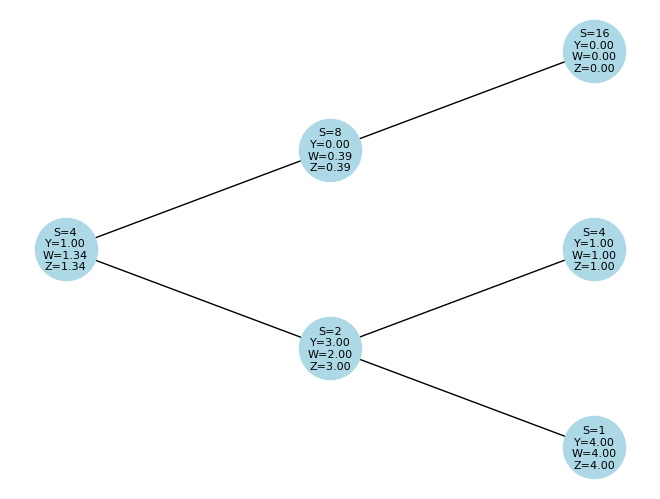

valor opción: 1.3395061728395061


In [28]:
#función americana
import matplotlib.pyplot as plt
import networkx as nx
# Parámetros iniciales
S0 = 4  # Precio inicial
K = 5   # Precio de ejercicio
T = 2     # Periodos
r = 1/5
B = 1+r
u = 2   # Factor de subida
d = 1/2   # Factor de bajada
cop = 1 # call (0) o put (1)

# Construir el árbol de precios S
def opc_ame(S0, K, T, r, B, u, d, cop):
  levels = {}  # Diccionario para almacenar los nodos por nivel
  for t in range(T+1):
      levels[t] = [S0 * (u ** ups) * (d ** (t - ups)) for ups in reversed(range(t + 1))]

  # Calcular q_n y X_n para cada nodo
  Y = {}  # Diccionario para almacenar los valores Y
  W = {}  # Diccionario para almacenar los valores W
  Z = {}  # Diccionario para almacenar los valores W
  a = {}
  b = {}

  q = (1+r-d)/(u-d)

  for idx, S_T in enumerate(levels[T]):
      Y[(T, idx)] = max((S_T - K)*(-1)**(cop), 0) ##parametrizando el payoff para que sea call o put
      Z[(T, idx)] = max((S_T - K)*(-1)**(cop), 0)
      W[(T, idx)] = max((S_T - K)*(-1)**(cop), 0)
  # Calcular X para nodos anteriores a T
  for t in reversed(range(T)):
      for idx, S_n in enumerate(levels[t]):
          S_u = levels[t+1][idx+1]
          S_d = levels[t+1][idx]
          Y[(t, idx)] = max((S_n - K)*(-1)**(cop), 0)
          W[(t, idx)] = (q * Z[(t+1, idx+1)] + (1 - q) * Z[(t+1, idx)])*1/B
          Z[(t, idx)] = max(Y[(t, idx)],W[(t, idx)])
          a[(t, idx)] = (Z[(t+1, idx+1)] - Z[(t+1, idx)]) / ((u-d)*S_n) #(S_u - S_d)
          b[(t, idx)] = (Z[(t+1, idx+1)] - ((Z[(t+1, idx+1)] - Z[(t+1, idx)])*S_u) / (S_u - S_d))*(1/B)

  print(levels)
  print(q)
  print(Y)
  print(W)
  print(Z)
  print(a)
  print(b)


  # Función para graficar el árbol
  def plot_tree(levels, X,Y,Z):
      G = nx.Graph()
      pos = {}
      for t in levels:
          for idx, S in enumerate(levels[t]):
              node_label = (t, idx)
              G.add_node(node_label)
              pos[node_label] = (2*t, -2*idx + t)
              if t > 0:
                  parent_label = (t-1, idx) if idx < len(levels[t-1]) else (t-1, idx-1)
                  G.add_edge(parent_label, node_label)

      labels = {node: f"S={S:.0f}\nY={X[node]:.2f}\nW={Y[node]:.2f}\nZ={Z[node]:.2f}" for node, S in zip(pos.keys(), sum(levels.values(), []))}

      nx.draw(G, pos, labels=labels, with_labels=True, node_size=2000, node_color='lightblue', font_size=8, arrows=False)
      plt.show()

  plot_tree(levels, Y,W,Z )
  return q, Y, W, Z, a, b, Z[(0,0)]



S0 = 4  # Precio inicial
K = 5   # Precio de ejercicio
T = 2     # Periodos
r = 1/5
B = 1+r
u = 2   # Factor de subida
d = 1/2   # Factor de bajada
cop = 1 # call (0) o put (1)

q, Y, W, Z, a, b, valopc = opc_ame(S0, K, T, r, B, u, d, cop)
print("valor opción:", valopc)

## Función europea binomial

{0: [4.0], 1: [8.0, 2.0], 2: [16.0, 4.0, 1.0]}
0.4666666666666666
{(2, 0): 0, (2, 1): 1.0, (2, 2): 4.0, (1, 0): 0, (1, 1): 3.0, (0, 0): 1.0}
{(2, 0): 0, (2, 1): 1.0, (2, 2): 4.0, (1, 0): 0.38888888888888884, (1, 1): 2.0, (0, 0): 1.3395061728395061}
{(2, 0): 0, (2, 1): 1.0, (2, 2): 4.0, (1, 0): 0.38888888888888884, (1, 1): 3.0, (0, 0): 1.3395061728395061}
{(1, 0): 0.08333333333333333, (1, 1): 1.0, (0, 0): 0.26851851851851855}
{(1, 0): 1.1111111111111112, (1, 1): 4.166666666666667, (0, 0): 2.114197530864198}


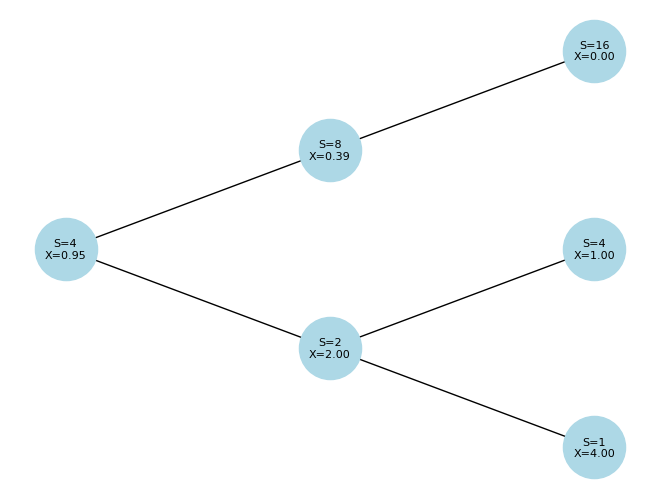

valor opción: 0.9506172839506172


In [29]:
import matplotlib.pyplot as plt
import networkx as nx
# Parámetros iniciales
# Construir el árbol de precios S
def opc_eur(S0, K, T, r, B, u, d, cop):
  levels = {}  # Diccionario para almacenar los nodos por nivel
  for t in range(T+1):
      levels[t] = [S0 * (u ** ups) * (d ** (t - ups)) for ups in reversed(range(t + 1))]

  # Calcular q_n y X_n para cada nodo

  X = {}  # Diccionario para almacenar los valores W
  a = {}
  b = {}

  q = (1+r-d)/(u-d)

  for idx, S_T in enumerate(levels[T]):
      X[(T, idx)] = max((S_T - K)*(-1)**(cop), 0)
  # Calcular X para nodos anteriores a T
  for t in reversed(range(T)):
      for idx, S_n in enumerate(levels[t]):
          S_u = levels[t+1][idx+1]
          S_d = levels[t+1][idx]
          X[(t, idx)] = (q * X[(t+1, idx+1)] + (1 - q) * X[(t+1, idx)])*1/B
          a[(t, idx)] = (X[(t+1, idx+1)] - X[(t+1, idx)]) / ((u-d)*S_n) #(S_u - S_d)
          b[(t, idx)] = (X[(t+1, idx+1)] - ((X[(t+1, idx+1)] - X[(t+1, idx)])*S_u) / (S_u - S_d))*(1/B)

  print(levels)
  print(q)
  print(Y)
  print(W)
  print(Z)
  print(a)
  print(b)


  # Función para graficar el árbol
  def plot_tree(levels, X):
      G = nx.Graph()
      pos = {}
      for t in levels:
          for idx, S in enumerate(levels[t]):
              node_label = (t, idx)
              G.add_node(node_label)
              pos[node_label] = (2*t, -2*idx + t)
              if t > 0:
                  parent_label = (t-1, idx) if idx < len(levels[t-1]) else (t-1, idx-1)
                  G.add_edge(parent_label, node_label)

      labels = {node: f"S={S:.0f}\nX={X[node]:.2f}" for node, S in zip(pos.keys(), sum(levels.values(), []))}

      nx.draw(G, pos, labels=labels, with_labels=True, node_size=2000, node_color='lightblue', font_size=8, arrows=False)
      plt.show()

  plot_tree(levels, X )
  return q, X, a, b, X[(0,0)]



S0 = 4  # Precio inicial
K = 5   # Precio de ejercicio
T = 2     # Periodos
r = 1/5
B = 1+r
u = 2   # Factor de subida
d = 1/2   # Factor de bajada
cop = 1 # call (0) o put (1)

q, X, a, b, valopc = opc_eur(S0, K, T, r, B, u, d, cop)
print("valor opción:", valopc)

## Agregar el tiempo de paro en la función de opciones americanas:

In [50]:
def opc_ame(S0, K, T, r, B, u, d, cop):
  levels = {}  # Diccionario para almacenar los nodos por nivel
  for t in range(T+1):
      levels[t] = [S0 * (u ** ups) * (d ** (t - ups)) for ups in reversed(range(t + 1))]

  # Calcular q_n y X_n para cada nodo
  Y = {}  # Diccionario para almacenar los valores Y
  W = {}  # Diccionario para almacenar los valores W
  Z = {}  # Diccionario para almacenar los valores W
  a = {}
  b = {}
  TP = {} # Diccionario para almacenar el indicador de tiempo de paro

  q = (1+r-d)/(u-d)

  for idx, S_T in enumerate(levels[T]):
      Y[(T, idx)] = max((S_T - K)*(-1)**(cop), 0) ##parametrizando el payoff para que sea call o put
      Z[(T, idx)] = max((S_T - K)*(-1)**(cop), 0)
      W[(T, idx)] = max((S_T - K)*(-1)**(cop), 0)
      a[(t, idx)] = 0
      b[(t, idx)] = 0
      TP[(t, idx)] = 0
  # Calcular X para nodos anteriores a T
  for t in reversed(range(T)):
      for idx, S_n in enumerate(levels[t]):
          S_u = levels[t+1][idx+1]
          S_d = levels[t+1][idx]
          Y[(t, idx)] = max((S_n - K)*(-1)**(cop), 0)
          W[(t, idx)] = (q * Z[(t+1, idx+1)] + (1 - q) * Z[(t+1, idx)])*1/B
          Z[(t, idx)] = max(Y[(t, idx)],W[(t, idx)])
          a[(t, idx)] = (Z[(t+1, idx+1)] - Z[(t+1, idx)]) / ((u-d)*S_n) #(S_u - S_d)
          b[(t, idx)] = (Z[(t+1, idx+1)] - ((Z[(t+1, idx+1)] - Z[(t+1, idx)])*S_u) / (S_u - S_d))*(1/B)
          if Z[(t, idx)]>W[(t, idx)]:
            TP[(t, idx)]=1
          else:
            TP[(t, idx)]=0

  lista_valores = list(TP.items())
  indice_maximo = max(range(len(lista_valores)), key=lambda i: lista_valores[i][1])
  clave_maxima = lista_valores[indice_maximo]
  tparo=[clave_maxima[0], clave_maxima]
  print(levels)
  print(q)
  print(Y)
  print(W)
  print(Z)
  print(a)
  print(b)
  print(tparo)


  # Función para graficar el árbol
  def plot_tree(levels, X,Y,Z,a,b,TP):
      G = nx.Graph()
      pos = {}
      for t in levels:
          for idx, S in enumerate(levels[t]):
              node_label = (t, idx)
              G.add_node(node_label)
              pos[node_label] = (2*t, -2*idx + t)
              if t > 0:
                  parent_label = (t-1, idx) if idx < len(levels[t-1]) else (t-1, idx-1)
                  G.add_edge(parent_label, node_label)

      labels = {node: f"S={S:.0f}\nY={X[node]:.2f}\nW={Y[node]:.2f}\nZ={Z[node]:.2f}\na={a[node]:.2f}\nb={b[node]:.2f}\nTP={TP[node]:.2f}" for node, S in zip(pos.keys(), sum(levels.values(), []))}

      nx.draw(G, pos, labels=labels, with_labels=True, node_size=2000, node_color='lightblue', font_size=6, arrows=False)
      plt.show()

  plot_tree(levels, Y,W,Z,a,b,TP )
  return q, Y, W, Z, a, b, Z[(0,0)], tparo

((4, 3), 1)
{0: [4.0], 1: [8.0, 2.0], 2: [16.0, 4.0, 1.0], 3: [32.0, 8.0, 2.0, 0.5], 4: [64.0, 16.0, 4.0, 1.0, 0.25], 5: [128.0, 32.0, 8.0, 2.0, 0.5, 0.125]}
0.4666666666666666
{(5, 0): 0, (5, 1): 0, (5, 2): 0, (5, 3): 3.0, (5, 4): 4.5, (5, 5): 4.875, (4, 0): 0, (4, 1): 0, (4, 2): 1.0, (4, 3): 4.0, (4, 4): 4.75, (3, 0): 0, (3, 1): 0, (3, 2): 3.0, (3, 3): 4.5, (2, 0): 0, (2, 1): 1.0, (2, 2): 4.0, (1, 0): 0, (1, 1): 3.0, (0, 0): 1.0}
{(5, 0): 0, (5, 1): 0, (5, 2): 0, (5, 3): 3.0, (5, 4): 4.5, (5, 5): 4.875, (4, 0): 0.0, (4, 1): 0.0, (4, 2): 1.1666666666666667, (4, 3): 3.0833333333333335, (4, 4): 3.895833333333334, (3, 0): 0.0, (3, 1): 0.45370370370370366, (3, 2): 2.0740740740740744, (3, 3): 3.625, (2, 0): 0.17644032921810698, (2, 1): 1.368312757201646, (2, 2): 3.0833333333333335, (1, 0): 0.6105395518975765, (1, 1): 2.163694558756287, (0, 0): 1.438017578621145}
{(5, 0): 0, (5, 1): 0, (5, 2): 0, (5, 3): 3.0, (5, 4): 4.5, (5, 5): 4.875, (4, 0): 0, (4, 1): 0, (4, 2): 1.1666666666666667, (4, 

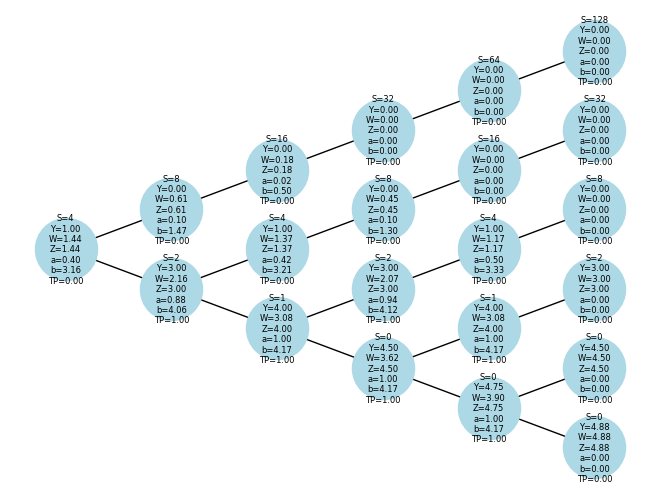

valor opción: 1.438017578621145
tiempo de paro: [(4, 3), ((4, 3), 1)]


In [51]:
q, Y, W, Z, a, b, valopc, tparo = opc_ame(S0, K, 5, r, B, u, d, cop)
print("valor opción:", valopc)

print("tiempo de paro:", tparo)